<a href="https://colab.research.google.com/github/kanishkagupta88666/DATASCIENCELGM/blob/main/IRIS_FLOWER_CLASSIFICATION_IN_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1 IRIS FLOWER CLASSIFICATION IN ML 
BY KANISHKA GUPTA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
print("libraries imported successfully")

libraries imported successfully


In [2]:
url ='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url,error_bad_lines = False)
df.head(11)
# http://archive.ics.uci.edu/ml/machine-learning-databases/iris/

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
r,c = df.shape
print("Number of rows =",r)
print("Number of columns =",c)

Number of rows = 150
Number of columns = 5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
print("Are there any missung values in the dataset ?",df.isnull().values.any())

Are there any missung values in the dataset ? False


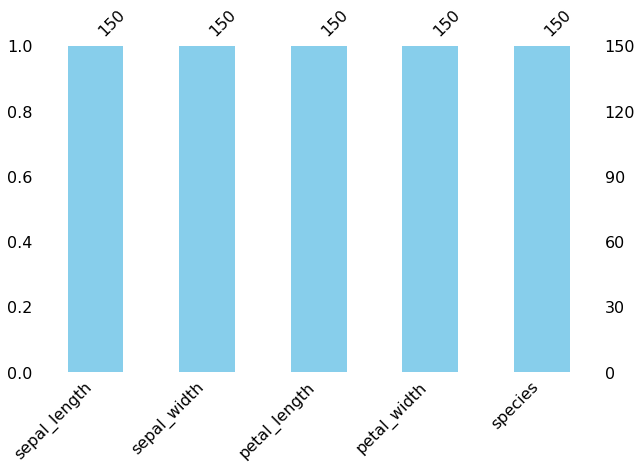

In [6]:
msno.bar(df,figsize=(10,6),color = 'skyblue')
plt.show()

In [7]:

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
petal_length,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
petal_width,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
species,150,3,virginica,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

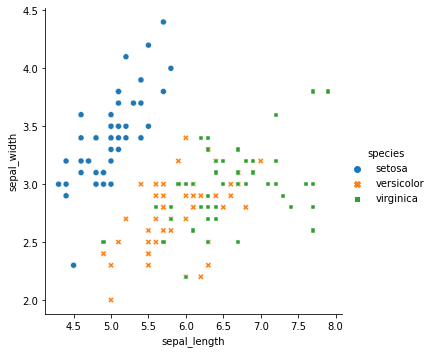

In [9]:
g = sns.relplot(x='sepal_length',y = 'sepal_width',data = df, hue='species',style='species')

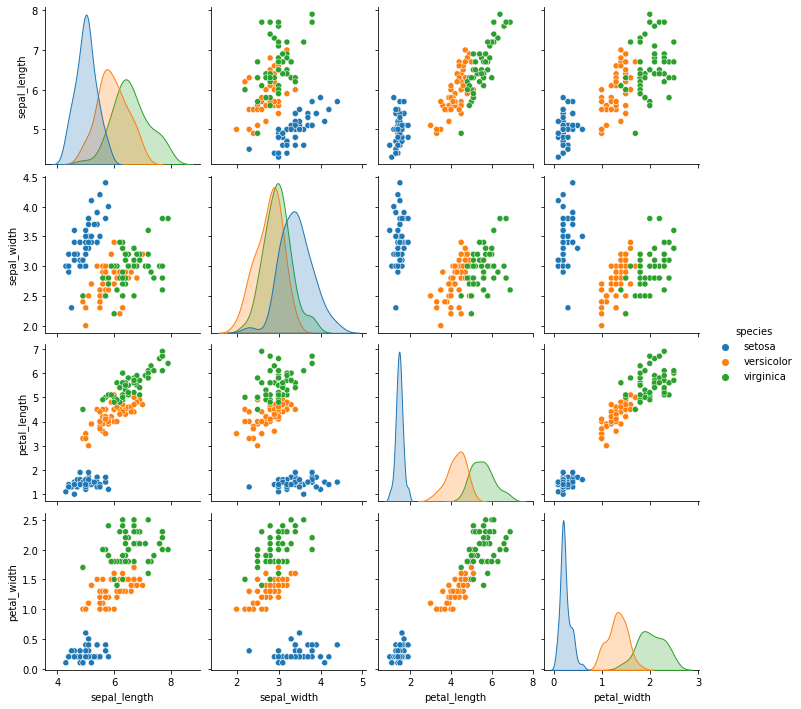

In [11]:
sns.pairplot(df,hue='species')
plt.show()

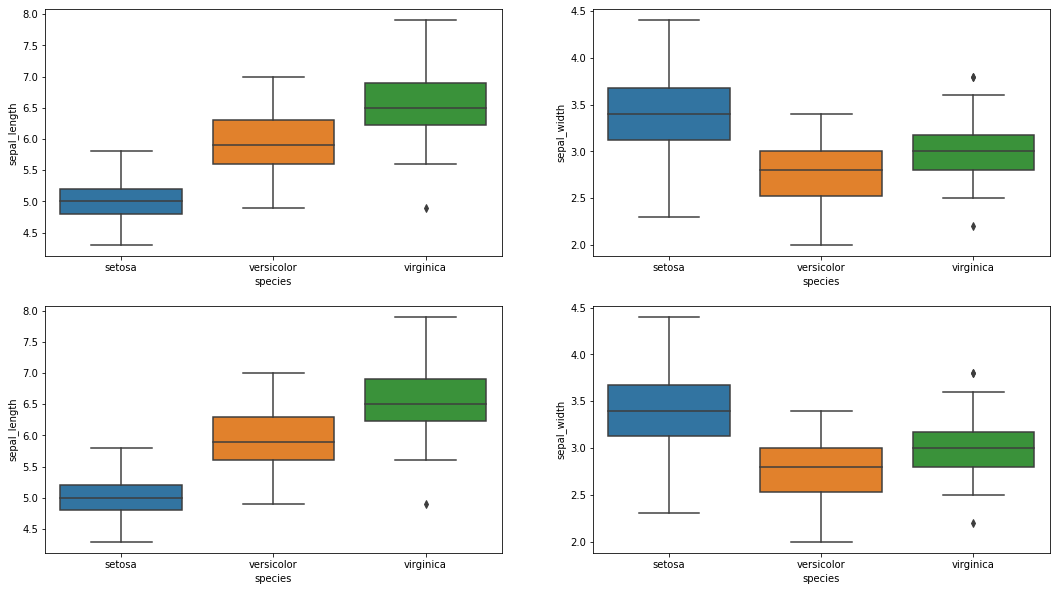

In [12]:

plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='sepal_width',data=df)
plt.show()

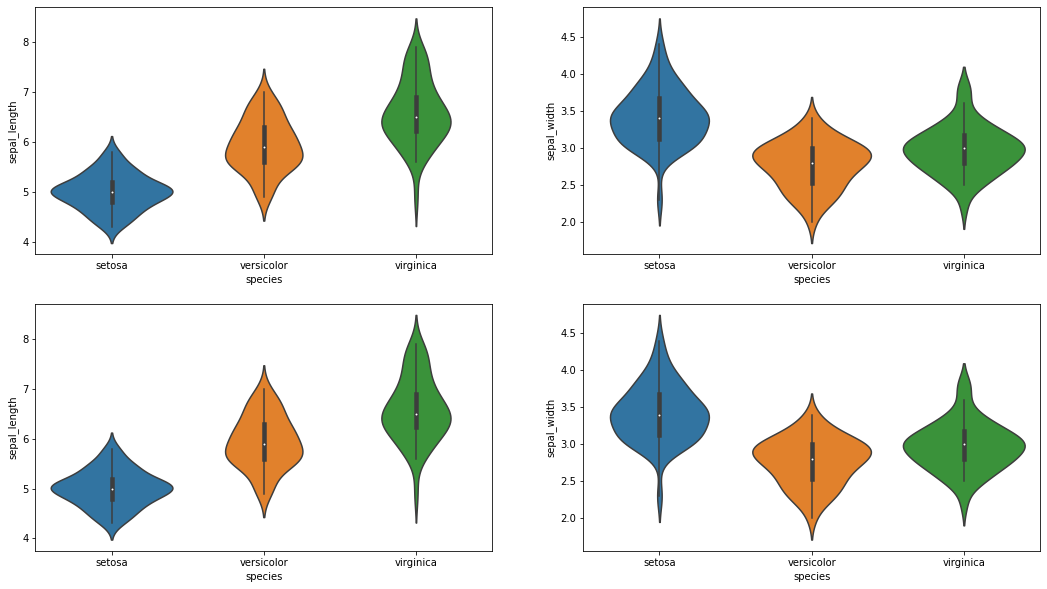

In [13]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)
plt.show()

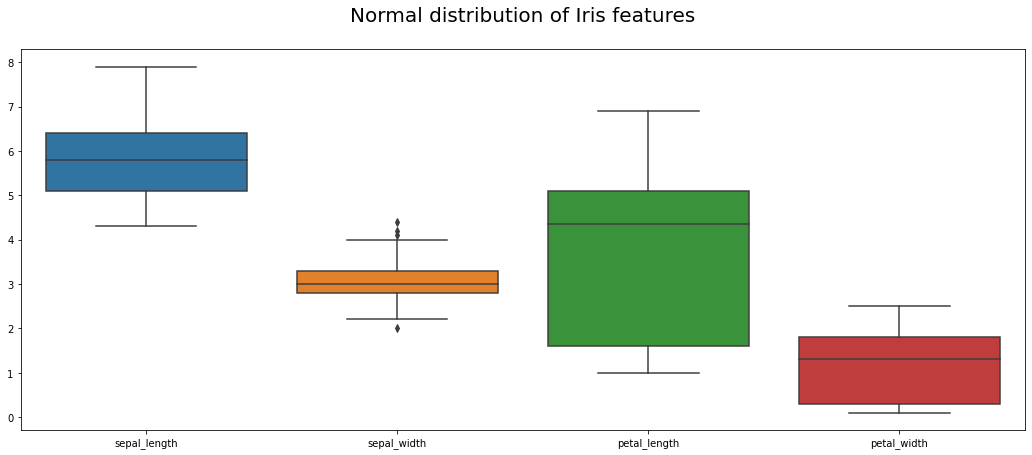

In [14]:
plt.figure(figsize=(18,7))
sns.boxplot(data=df).set_title("Normal distribution of Iris features\n",size=20)
plt.show()

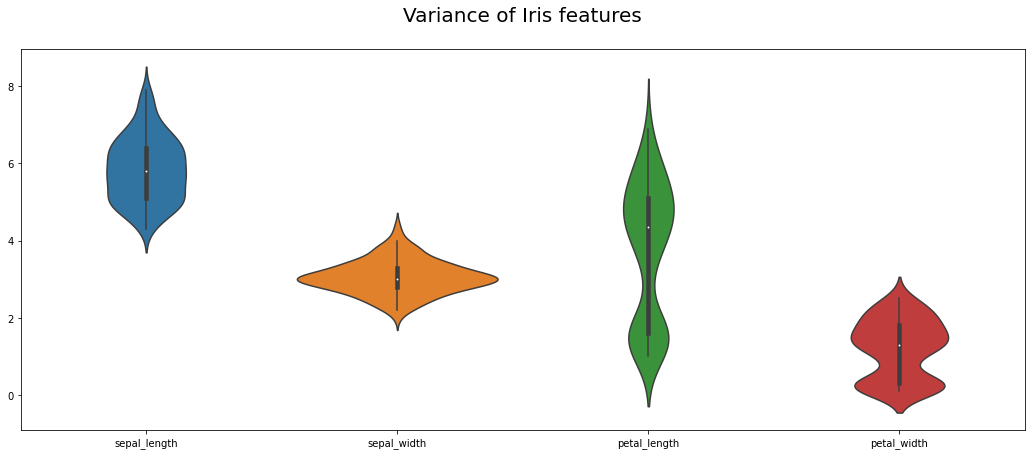

In [15]:
plt.figure(figsize=(18,7))
sns.violinplot(data=df).set_title("Variance of Iris features\n",size=20)
plt.show()

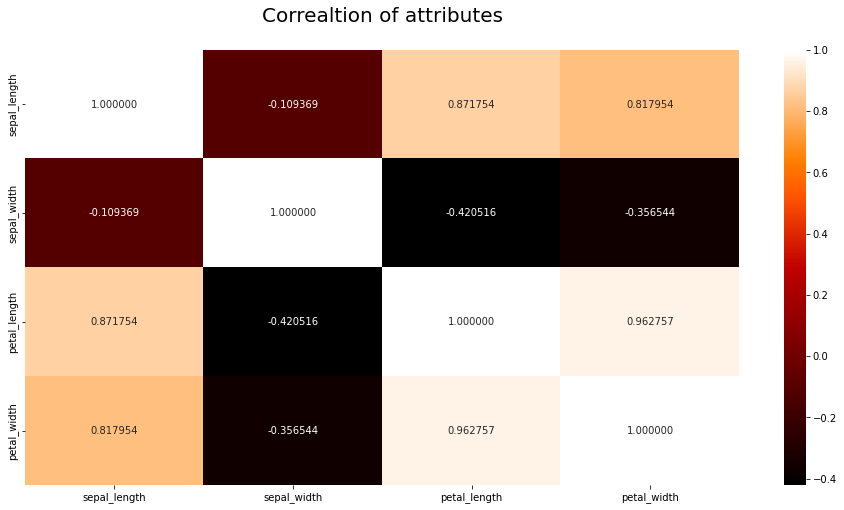

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='f',cmap='gist_heat').set_title('Correaltion of attributes\n',size=20)
plt.show()

In [18]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
from sklearn.metrics import make_scorer,accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("All metrics included!")

All metrics included!


In [20]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("All ML packages included!")

All ML packages included!


In [21]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
acc_rf = round(accuracy_score(y_test,y_pred)*100,2)
rf_acc = round(rf.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of Random Forest\n",cm)
print("Accuracy of Random Forest = ",acc)
print("Precision of Random Forest = ",prec)
print("Recall of Random Forest = ",recall)
print("f1 score of Random Forest = ",f1)

Confusion matrix of Random Forest
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy of Random Forest =  0.9666666666666667
Precision of Random Forest =  0.9666666666666667
Recall of Random Forest =  0.9666666666666667
f1 score of Random Forest =  0.9666666666666667


In [22]:
lg = LogisticRegression(solver='lbfgs',max_iter=400)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
acc_lg = round(accuracy_score(y_test,y_pred)*100,2)
lg_acc = round(lg.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of Logistic Regression\n",cm)
print("\nAccuracy of Logistic Regression = ",acc)
print("\nPrecision of Logistic Regression = ",prec)
print("\nRecall of Logistic Regression = ",recall)
print("\nf1 score of Logistic Regression = ",f1)

Confusion matrix of Logistic Regression
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of Logistic Regression =  1.0

Precision of Logistic Regression =  1.0

Recall of Logistic Regression =  1.0

f1 score of Logistic Regression =  1.0


In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_test,y_pred)*100,2)
knn_acc = round(knn.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour =  0.9666666666666667

Precision of K Nearest Neighbour =  0.9666666666666667

Recall of K Nearest Neighbour =  0.9666666666666667

f1 score of K Nearest Neighbour =  0.9666666666666667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


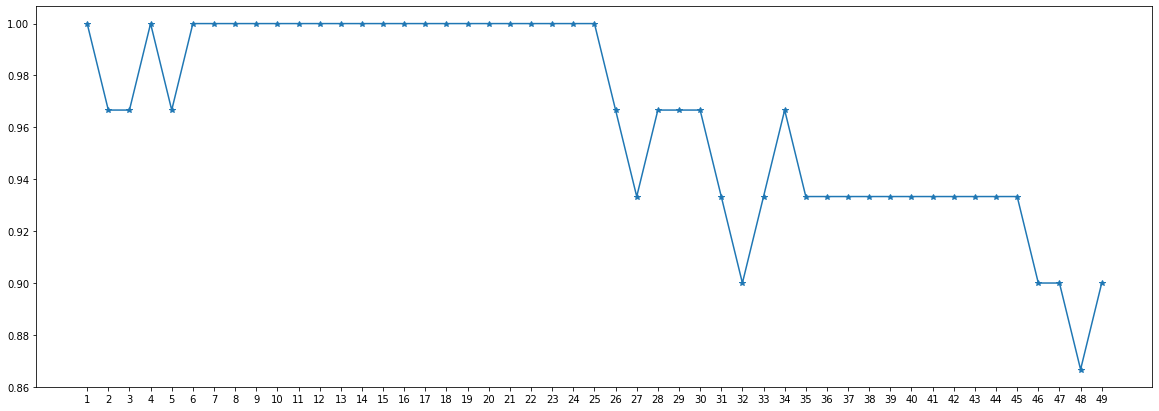

In [24]:
plt.figure(figsize=(20,7))
a_index = list(range(1,50))
a = pd.Series()
x = range(1,50)
for i in list(range(1,50)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  prediction = model.predict(X_test)
  a = a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index,a,marker="*")
plt.xticks(x)
plt.show()


In [25]:

gauss = GaussianNB()
gauss.fit(X_train,y_train)
y_pred = gauss.predict(X_test)
acc_gauss = round(accuracy_score(y_test,y_pred)*100,2)
gauss_acc = round(gauss.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

Accuracy of K Nearest Neighbour =  0.9666666666666667

Precision of K Nearest Neighbour =  0.9666666666666667

Recall of K Nearest Neighbour =  0.9666666666666667

f1 score of K Nearest Neighbour =  0.9666666666666667


In [26]:
lsvc = LinearSVC(max_iter=4000)
lsvc.fit(X_train,y_train)
y_pred = lsvc.predict(X_test)
acc_lsvc = round(accuracy_score(y_test,y_pred)*100,2)
lsvc_acc = round(lsvc.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour =  1.0

Precision of K Nearest Neighbour =  1.0

Recall of K Nearest Neighbour =  1.0

f1 score of K Nearest Neighbour =  1.0


In [27]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = round(accuracy_score(y_test,y_pred)*100,2)
dt_acc = round(dt.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour =  1.0

Precision of K Nearest Neighbour =  1.0

Recall of K Nearest Neighbour =  1.0

f1 score of K Nearest Neighbour =  1.0


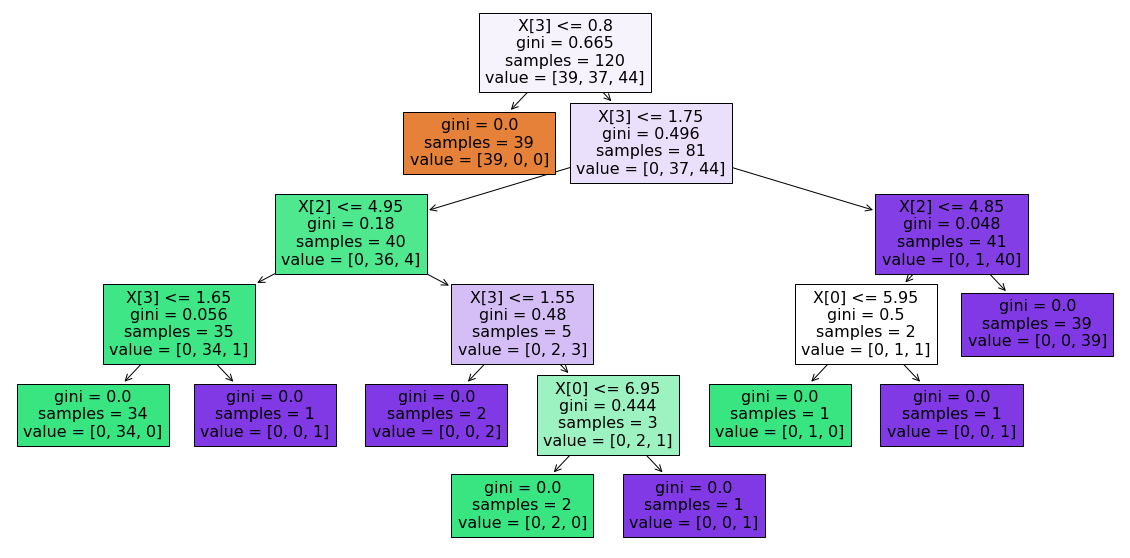

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt.fit(X_train,y_train),filled=True)
plt.show()

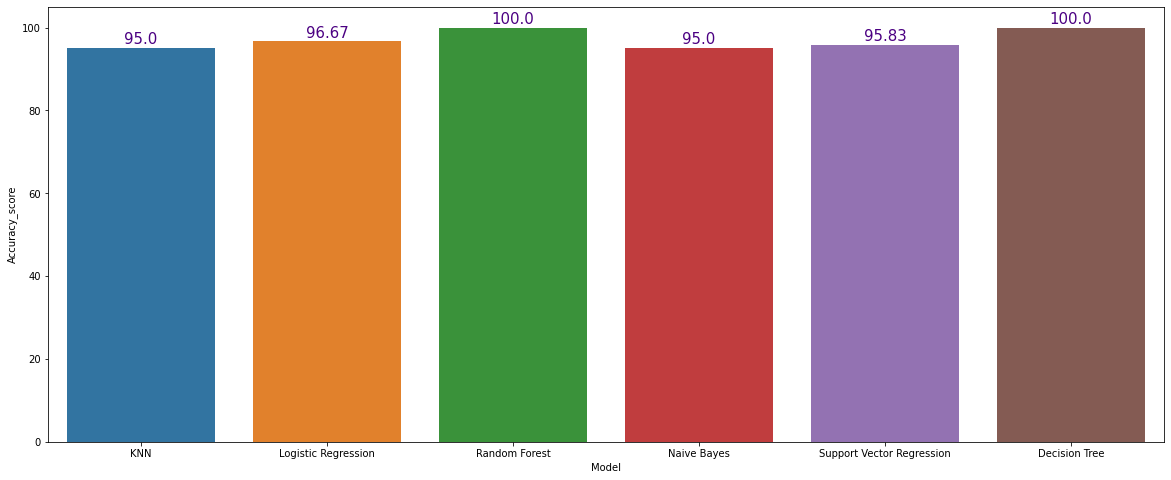

In [29]:
res = pd.DataFrame(
    {
        'Model':['KNN','Logistic Regression','Random Forest','Naive Bayes','Support Vector Regression','Decision Tree'],
     'Score':[acc_knn,acc_lg,acc_rf,acc_gauss,acc_lsvc,acc_dt],
     'Accuracy_score':[knn_acc,lg_acc,rf_acc,gauss_acc,lsvc_acc,dt_acc]
    }
)


res
plt.figure(figsize=(20,8))
ax = sns.barplot(x='Model',y='Accuracy_score',data=res)
labels = (res['Accuracy_score'])
for i,v in enumerate(labels):
  ax.text(i,v+1,str(v),horizontalalignment='center',size=15,color='indigo')

CONCLUSION




This dataset is best predicted by using a random forest or decision tree classifier, As you can see in above graph it has pradiction percentage of 100%. This is beacuse two species having many similarities but differs in some minute difference in combination of features, which can not recognize by any form og regression. Hence it can be classfied better by a non-linear classifier like decision tree or random forest methon i.e. an array of decision tree
